In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Import Data

In [2]:
DATA_PATH = '../Capital IQ - Key Development/KeyDev_top25_11Jun24_1546_test.csv'

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,enterdate,entertime,entereddateutc,lastmodifieddate,lastmodifieddateutc,mostimportantdateutc,speffectivedate,sptodate,gvkey,sourcetypename
0,321351978,19007,Baker Hughes Holdings LLC,"Baker Hughes Incorporated to Report Q4, 2015 R...",55,Earnings Release Date,1,Target,2016-01-05,10:00:00 PM,...,2016-01-05,8:45:00 PM,06JAN2016:01:45:00.000000,29JUN2017:08:35:00.000000,29JUN2017:12:35:00.000000,28JAN2016:14:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire
1,322136945,19007,Baker Hughes Holdings LLC,Baker Hughes Incorporated Presents at 2016 DUG...,51,Company Conference Presentations,1,Target,2016-01-13,8:14:00 PM,...,2016-01-14,5:03:00 AM,14JAN2016:10:03:00.000000,14JAN2016:05:03:00.000000,14JAN2016:10:03:00.000000,10MAR2016:16:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,MULTIPLE
2,322134567,19007,Baker Hughes Holdings LLC,"Hart Energy Publishing LP, 2016 DUG Rockies Co...",149,Conferences,8,Participant,2016-01-14,4:00:00 AM,...,2016-01-14,4:11:00 AM,14JAN2016:09:11:00.000000,28AUG2016:00:02:00.000000,28AUG2016:04:02:00.000000,09MAR2016:07:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,MULTIPLE
3,323665965,19007,Baker Hughes Holdings LLC,Baker Hughes Incorporated Reports Consolidated...,28,Announcements of Earnings,1,Target,2016-01-28,1:00:00 PM,...,2016-01-28,9:11:00 AM,28JAN2016:14:11:00.000000,29JUN2017:07:05:00.000000,29JUN2017:11:05:00.000000,28JAN2016:13:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire
4,325154773,19007,Baker Hughes Holdings LLC,Halliburton Reportedly To Sell Offshore Fluids...,65,M&A Rumors and Discussions,1,Target,2016-02-09,12:00:00 AM,...,2016-02-09,1:47:00 PM,09FEB2016:18:47:00.000000,09FEB2016:15:14:00.000000,09FEB2016:20:14:00.000000,09FEB2016:05:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,Bloomberg News


In [4]:
df['companyid'].nunique()

25

## Clean Data

In [5]:
df.isna().sum()

keydevid                        0
companyid                       0
companyname                     0
headline                        0
keydeveventtypeid               0
eventtype                       0
keydevtoobjectroletypeid        0
objectroletype                  0
announcedate                    0
announcetime                    0
announcedateTimeZone            0
announceddateutc                0
enterdate                       0
entertime                       0
entereddateutc                  0
lastmodifieddate                0
lastmodifieddateutc             0
mostimportantdateutc            0
speffectivedate                 0
sptodate                    15947
gvkey                           0
sourcetypename                  0
dtype: int64

## Map Headline to target

In [6]:
## Calulate the following next Friday identifying the target period
df['announcedate'] = pd.to_datetime(df['announcedate'])
df['fri_of_week'] = df['announcedate'].dt.to_period('W-FRI').apply(lambda r: r.end_time).dt.date

## next_fri_of_week is the week for the target
df['next_fri_of_week'] = df['fri_of_week'] + timedelta(days=7)
df.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,entereddateutc,lastmodifieddate,lastmodifieddateutc,mostimportantdateutc,speffectivedate,sptodate,gvkey,sourcetypename,fri_of_week,next_fri_of_week
0,321351978,19007,Baker Hughes Holdings LLC,"Baker Hughes Incorporated to Report Q4, 2015 R...",55,Earnings Release Date,1,Target,2016-01-05,10:00:00 PM,...,06JAN2016:01:45:00.000000,29JUN2017:08:35:00.000000,29JUN2017:12:35:00.000000,28JAN2016:14:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire,2016-01-08,2016-01-15
1,322136945,19007,Baker Hughes Holdings LLC,Baker Hughes Incorporated Presents at 2016 DUG...,51,Company Conference Presentations,1,Target,2016-01-13,8:14:00 PM,...,14JAN2016:10:03:00.000000,14JAN2016:05:03:00.000000,14JAN2016:10:03:00.000000,10MAR2016:16:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,MULTIPLE,2016-01-15,2016-01-22
2,322134567,19007,Baker Hughes Holdings LLC,"Hart Energy Publishing LP, 2016 DUG Rockies Co...",149,Conferences,8,Participant,2016-01-14,4:00:00 AM,...,14JAN2016:09:11:00.000000,28AUG2016:00:02:00.000000,28AUG2016:04:02:00.000000,09MAR2016:07:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,MULTIPLE,2016-01-15,2016-01-22
3,323665965,19007,Baker Hughes Holdings LLC,Baker Hughes Incorporated Reports Consolidated...,28,Announcements of Earnings,1,Target,2016-01-28,1:00:00 PM,...,28JAN2016:14:11:00.000000,29JUN2017:07:05:00.000000,29JUN2017:11:05:00.000000,28JAN2016:13:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire,2016-01-29,2016-02-05
4,325154773,19007,Baker Hughes Holdings LLC,Halliburton Reportedly To Sell Offshore Fluids...,65,M&A Rumors and Discussions,1,Target,2016-02-09,12:00:00 AM,...,09FEB2016:18:47:00.000000,09FEB2016:15:14:00.000000,09FEB2016:20:14:00.000000,09FEB2016:05:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,Bloomberg News,2016-02-12,2016-02-19


In [7]:
## Load mapping between crsp and key dev data
mapper_df = pd.read_csv('../Capital IQ - Key Development/mergeTable_top25_11Jun2024_1546.csv')
mapper_df = mapper_df[['GVKEY', 'LPERMCO']].drop_duplicates()
mapper_df = mapper_df.rename(columns={'GVKEY': 'gvkey', 'LPERMCO': 'PERMCO'})
mapper_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12652\3367619484.py:2: DtypeWarning: Columns (11,18,21,24,26,45,52,60,71,72,77,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  mapper_df = pd.read_csv('../Capital IQ - Key Development/mergeTable_top25_11Jun2024_1546.csv')


,gvkey,PERMCO
0,1380,20064
2769,1976,20253
5538,2410,20333
8307,2991,20440
11076,4503,20678


In [8]:
## Add mapper to key dev data
mapper_df['gvkey'] = mapper_df['gvkey'].astype(int).astype(str)
df['gvkey'] = df['gvkey'].astype(int).astype(str)

df = pd.merge(df, mapper_df[['gvkey', 'PERMCO']], on='gvkey', how='inner')

In [9]:
## Check the number of unique PERMCO
df['PERMCO'].nunique()

25

## Load target data

In [10]:
target_path = 'test_period_v6_preprocessed_top25_14Jun24.csv'

target_df = pd.read_csv(target_path)
target_df.head()

,PERMCO,fri_of_week,sum_log_RET_plus1,TICKER,COMNAM,weekly_return,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,moving_prc_dir
0,2381,2016-01-15,-0.045155,ENB,ENBRIDGE INC,-4.415097,0,-4.459144,0.044046,1,30.31,31.71,-1.40,0
1,2381,2016-01-22,0.098574,ENB,ENBRIDGE INC,10.359645,1,-4.415097,14.774742,1,33.45,30.31,3.14,1
2,2381,2016-01-29,0.033804,ENB,ENBRIDGE INC,3.438143,1,10.359645,-6.921502,0,34.60,33.45,1.15,1
3,2381,2016-02-05,-0.020734,ENB,ENBRIDGE INC,-2.052012,0,3.438143,-5.490155,0,33.89,34.60,-0.71,0
4,2381,2016-02-12,-0.048848,ENB,ENBRIDGE INC,-4.767402,0,-2.052012,-2.715390,0,31.88,33.89,-2.01,0


In [11]:
## Map target data and key dev
df['next_fri_of_week'] = df['next_fri_of_week'].astype(str)
target_df['fri_of_week'] = target_df['fri_of_week'].astype(str)

## the next_fri_of_week from key dev must be the same as fri_of_week from crsp
df = pd.merge(df, target_df, left_on=['PERMCO', 'next_fri_of_week'], 
              right_on=['PERMCO', 'fri_of_week'], how='right')
df['headline'] = df['headline'].fillna('No_Headlines')
df = df.drop_duplicates()

In [12]:
df[df['headline']=='No_Headlines'].shape

(4387, 38)

In [13]:
## Check example of the data
df.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,COMNAM,weekly_return,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,moving_prc_dir
0,321206680.0,280420.0,Enbridge Inc.,Enbridge Inc. Provides Earnings Guidance for t...,29.0,Corporate Guidance - New/Confirmed,1.0,Target,2016-01-04,11:05:00 AM,...,ENBRIDGE INC,-4.415097,0,-4.459144,0.044046,1,30.31,31.71,-1.40,0
1,321977318.0,280420.0,Enbridge Inc.,Enbridge Inc. Presents at TD Securities London...,51.0,Company Conference Presentations,1.0,Target,2016-01-12,4:27:00 PM,...,ENBRIDGE INC,10.359645,1,-4.415097,14.774742,1,33.45,30.31,3.14,1
2,NaN,NaN,NaN,No_Headlines,NaN,NaN,NaN,NaN,NaT,NaN,...,ENBRIDGE INC,3.438143,1,10.359645,-6.921502,0,34.60,33.45,1.15,1
3,323693125.0,280420.0,Enbridge Inc.,"Enbridge Inc., Enbridge Income Fund Holdings I...",48.0,Earnings Calls,1.0,Target,2016-01-28,2:15:00 AM,...,ENBRIDGE INC,-2.052012,0,3.438143,-5.490155,0,33.89,34.60,-0.71,0
4,324643177.0,280420.0,Enbridge Inc.,"Peters & Co., Limited, Peters & Co. Limited 20...",149.0,Conferences,8.0,Participant,2016-02-03,11:23:00 PM,...,ENBRIDGE INC,-4.767402,0,-2.052012,-2.715390,0,31.88,33.89,-2.01,0


In [14]:
## Check if if labeled fri_of_week is correct
df[['next_fri_of_week', 'fri_of_week_x', 'fri_of_week_y']].drop_duplicates()

,next_fri_of_week,fri_of_week_x,fri_of_week_y
0,2016-01-15,2016-01-08,2016-01-15
1,2016-01-22,2016-01-15,2016-01-22
2,NaN,NaN,2016-01-29
3,2016-02-05,2016-01-29,2016-02-05
4,2016-02-12,2016-02-05,2016-02-12
...,...,...,...
10780,NaN,NaN,2022-05-13
12468,NaN,NaN,2019-08-09
14216,NaN,NaN,2016-04-22
15037,NaN,NaN,2017-11-24


In [15]:
df.groupby('PERMCO')['fri_of_week_y'].nunique().reset_index().groupby('fri_of_week_y').count()

,PERMCO
fri_of_week_y,
384,1
416,24


# Data Formatting

In [16]:
df2 = df.copy()

In [17]:
## calulate the monday of week
df2['mon_of_week'] = pd.to_datetime(df2['fri_of_week_y']) + timedelta(days=-4)
df2[['mon_of_week', 'fri_of_week_y']].drop_duplicates()

,mon_of_week,fri_of_week_y
0,2016-01-11,2016-01-15
1,2016-01-18,2016-01-22
2,2016-01-25,2016-01-29
3,2016-02-01,2016-02-05
4,2016-02-08,2016-02-12
...,...,...
810,2023-11-27,2023-12-01
811,2023-12-04,2023-12-08
813,2023-12-11,2023-12-15
814,2023-12-18,2023-12-22


In [18]:
## Get the Week number of each stock
tmp = df2[['PERMCO', 'fri_of_week_y']].drop_duplicates()
tmp = tmp.sort_values(['PERMCO', 'fri_of_week_y'])

tmp['Week'] = tmp.groupby('PERMCO').cumcount() + 1
tmp.head()

,PERMCO,fri_of_week_y,Week
0,2381,2016-01-15,1
1,2381,2016-01-22,2
2,2381,2016-01-29,3
3,2381,2016-02-05,4
4,2381,2016-02-12,5


In [19]:
df2 = pd.merge(df2, tmp, on=['PERMCO', 'fri_of_week_y'], how='inner')
df2.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,moving_prc_dir,mon_of_week,Week
0,321206680.0,280420.0,Enbridge Inc.,Enbridge Inc. Provides Earnings Guidance for t...,29.0,Corporate Guidance - New/Confirmed,1.0,Target,2016-01-04,11:05:00 AM,...,0,-4.459144,0.044046,1,30.31,31.71,-1.40,0,2016-01-11,1
1,321977318.0,280420.0,Enbridge Inc.,Enbridge Inc. Presents at TD Securities London...,51.0,Company Conference Presentations,1.0,Target,2016-01-12,4:27:00 PM,...,1,-4.415097,14.774742,1,33.45,30.31,3.14,1,2016-01-18,2
2,NaN,NaN,NaN,No_Headlines,NaN,NaN,NaN,NaN,NaT,NaN,...,1,10.359645,-6.921502,0,34.60,33.45,1.15,1,2016-01-25,3
3,323693125.0,280420.0,Enbridge Inc.,"Enbridge Inc., Enbridge Income Fund Holdings I...",48.0,Earnings Calls,1.0,Target,2016-01-28,2:15:00 AM,...,0,3.438143,-5.490155,0,33.89,34.60,-0.71,0,2016-02-01,4
4,324643177.0,280420.0,Enbridge Inc.,"Peters & Co., Limited, Peters & Co. Limited 20...",149.0,Conferences,8.0,Participant,2016-02-03,11:23:00 PM,...,0,-2.052012,-2.715390,0,31.88,33.89,-2.01,0,2016-02-08,5


In [20]:
df2.columns

Index(['keydevid', 'companyid', 'companyname', 'headline', 'keydeveventtypeid',
       'eventtype', 'keydevtoobjectroletypeid', 'objectroletype',
       'announcedate', 'announcetime', 'announcedateTimeZone',
       'announceddateutc', 'enterdate', 'entertime', 'entereddateutc',
       'lastmodifieddate', 'lastmodifieddateutc', 'mostimportantdateutc',
       'speffectivedate', 'sptodate', 'gvkey', 'sourcetypename',
       'fri_of_week_x', 'next_fri_of_week', 'PERMCO', 'fri_of_week_y',
       'sum_log_RET_plus1', 'TICKER', 'COMNAM', 'weekly_return',
       'weekly_return_sign', 'previous_weekly_return', 'moving_return',
       'moving_return_dir', 'eow_adjusted_prc', 'previous_eom_adjusted_prc',
       'moving_prc', 'moving_prc_dir', 'mon_of_week', 'Week'],
      dtype='object')

In [22]:
format_cols = ['Week', 'From', 'To', 'Return', 'moving_prc_dir', 'Text', 'TICKER',
                'keydevid', 'companyid', 'companyname', 'keydeveventtypeid',
                'eventtype', 'keydevtoobjectroletypeid', 'objectroletype',
                'announcedate', 'announcetime', 'announcedateTimeZone',
                'announceddateutc', 'enterdate', 'entertime', 'entereddateutc',
                'lastmodifieddate', 'lastmodifieddateutc', 'mostimportantdateutc',
                'speffectivedate', 'sptodate', 'gvkey', 'sourcetypename',
                'fri_of_week_x', 'next_fri_of_week', 'PERMCO', 'TICKER', 'COMNAM', 'sum_log_RET_plus1',
                'weekly_return_sign', 'previous_weekly_return', 'moving_return',
                'moving_return_dir', 'eow_adjusted_prc', 'previous_eom_adjusted_prc',
                'moving_prc']

rename_dict = {'mon_of_week': 'From', 'fri_of_week_y': 'To', 'weekly_return': 'Return', 'headline': 'Text'}
df3 = df2.rename(columns=rename_dict)
df3 = df3[format_cols]
df3.head()

,Week,From,To,Return,moving_prc_dir,Text,TICKER,keydevid,companyid,companyname,...,TICKER,COMNAM,sum_log_RET_plus1,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc
0,1,2016-01-11,2016-01-15,-4.415097,0,Enbridge Inc. Provides Earnings Guidance for t...,ENB,321206680.0,280420.0,Enbridge Inc.,...,ENB,ENBRIDGE INC,-0.045155,0,-4.459144,0.044046,1,30.31,31.71,-1.40
1,2,2016-01-18,2016-01-22,10.359645,1,Enbridge Inc. Presents at TD Securities London...,ENB,321977318.0,280420.0,Enbridge Inc.,...,ENB,ENBRIDGE INC,0.098574,1,-4.415097,14.774742,1,33.45,30.31,3.14
2,3,2016-01-25,2016-01-29,3.438143,1,No_Headlines,ENB,NaN,NaN,NaN,...,ENB,ENBRIDGE INC,0.033804,1,10.359645,-6.921502,0,34.60,33.45,1.15
3,4,2016-02-01,2016-02-05,-2.052012,0,"Enbridge Inc., Enbridge Income Fund Holdings I...",ENB,323693125.0,280420.0,Enbridge Inc.,...,ENB,ENBRIDGE INC,-0.020734,0,3.438143,-5.490155,0,33.89,34.60,-0.71
4,5,2016-02-08,2016-02-12,-4.767402,0,"Peters & Co., Limited, Peters & Co. Limited 20...",ENB,324643177.0,280420.0,Enbridge Inc.,...,ENB,ENBRIDGE INC,-0.048848,0,-2.052012,-2.715390,0,31.88,33.89,-2.01


In [23]:
## Check the number of unique PERMCO
df3['PERMCO'].nunique()

25

In [24]:
df3 = df3.drop_duplicates(subset=['Week', 'PERMCO', 'Text'])

In [25]:
print(df3.shape, df3.drop_duplicates(subset=['Week', 'PERMCO', 'Text']).shape)

(19302, 41) (19302, 41)


In [ ]:
# abc = df3.groupby(['PERMCO', 'Text'])['Week'].count().reset_index()
# abc[abc['Week']>1] 

In [ ]:
# pd.set_option('display.max_columns', None)

In [ ]:
# df3[(df3['PERMCO']==2381) & df3['Text'].str.contains('Canadian Association of Petroleum')]

''

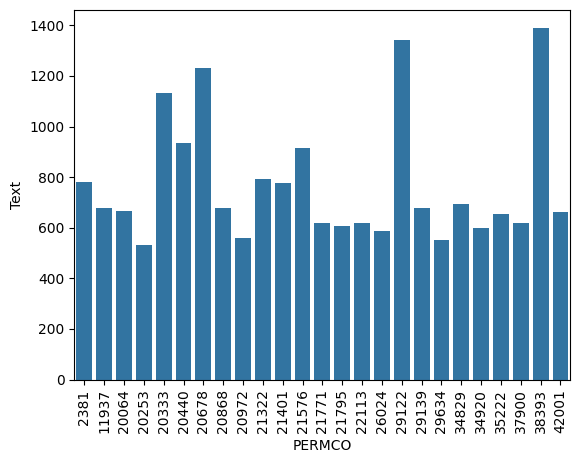

In [26]:
sns.barplot(df3.groupby('PERMCO')['Text'].count().reset_index().sort_values(by=['Text'], ascending=False), 
            x='PERMCO', y='Text')
plt.xticks(rotation=90)
;

In [27]:
df3.shape

(19302, 41)

In [28]:
# df3.to_csv('./combined_data_preprocessed_top25_12May24_1403.csv', index=False)
df3.to_csv('./combined_data_preprocessed_top25_14Jun24_test.csv', index=False)